<a href="https://colab.research.google.com/github/Rothy-0x/PA-Datmin-Kelompok6/blob/main/PA_Kelompok_6_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Crisp-DM Unsupervised Data

## Business Understanding

Sumber Dataset: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

1. **Tujuan Penggunaan Dataset**: Tujuan penggunaan dataset diabetes ini adalah untuk membangun model Clustering diabetes dengan menggunakan algoritma K-Means.

2. **Tujuan Perusahaan**: Tujuan dari perusahaan yang melakukan analisis ini untuk mengembangkan model Clustering yang akurat untuk membantu dokter atau perawat dalam mendiagnosis diabetes pada pasien mereka dengan cepat dan efisien. Selain itu, model ini juga dapat membantu pasien dalam memantau risiko diabetes mereka dan mengambil langkah-langkah pencegahan yang diperlukan.

3. **Tujuan Data Mining Clustering**: Tujuan dari data mining clustering pada dataset diabetes prediction ini adalah untuk mengelompokkan pasien berdasarkan karakteristik klinis mereka, seperti usia, kadar gula darah, tekanan darah, indeks massa tubuh, dan lain-lain, sehingga kita dapat mengidentifikasi pola yang tersembunyi dalam data. Dengan melakukan clustering pada data ini, kita dapat menemukan kelompok pasien yang memiliki risiko yang lebih tinggi untuk mengembangkan diabetes atau yang telah didiagnosis dengan diabetes. Informasi ini dapat membantu dokter atau ahli kesehatan dalam menentukan tindakan pencegahan dan pengobatan yang tepat untuk pasien-pasien tersebut. Selain itu, data mining clustering pada dataset ini dapat membantu dalam penelitian lebih lanjut tentang faktor-faktor risiko yang berkaitan dengan diabetes

##  Data Understanding

1. Collect Data
2. Penjelasan Setiap Kolom
3. Visualisasi

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset ke dalam DataFrame
df2 = pd.read_csv("https://raw.githubusercontent.com/Final-Project-Datmin/dataset/main/diabetes_prediction_dataset.csv?token=GHSAT0AAAAAAB7UQLLXSGVQX2QQYTIY5VMSZCJERPA")

# Cek dimensi dan tipe data
print(df2.shape)
print(df2.dtypes)

# Cek nilai yang hilang dan statistik deskriptif
print(df2.isna().sum())
print(df2.describe())

(100000, 9)
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000

### Describe Data

In [2]:
df2

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Deskripsi Kolom

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


1. gender : kolom yang berisi jenis kelamin dengan tipe data objek
2. age : kolom yang berisi umur dengan tipe data float
3. hypertension : kolom yang berisi tekanan darah dengan tipe data integer
4. heart_disease : kolom yang berisi kondisi penyakit jantung  dengan tipe data integer
5. smoking_history : kolom yang berisi apakah pasien pernah merokok dengan tipe data objek
6. bmi : kolom yang berisi Body Mass Index dengan tipe data float
7. HbA1c_level : kolom yang berisi level gula darah dengan tipe data float
8. blood_glucose_level : kolom yang berisi level glukosa darah dengan tipe data integer
9. diabetes : kolom yang berisi prediksi diabetes dengan tipe data integer

In [4]:
# Menampilkan 5 data teratas dalam DataFrame
print(df2.head())

# Menampilkan statistik deskriptif dari dataset
print(df2.describe())

# Menampilkan jumlah nilai unik pada setiap kolom
print(df2.nunique())


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0

In [5]:
# menampilkan banyak data 
len(df2)

100000

### Analisis setiap kolom

In [6]:
# Menghitung rata-rata dari masing-masing kolom
mean_values = df2.mean()
print(mean_values)

# Menghitung median dari masing-masing kolom
median_values = df2.median()
print(median_values)

# Menghitung standar deviasi dari masing-masing kolom
std_values = df2.std()
print(std_values)

# Menghitung korelasi antara kolom-kolom dataset
correlation = df2.corr()
print(correlation)


age                     41.885856
hypertension             0.074850
heart_disease            0.039420
bmi                     27.320767
HbA1c_level              5.527507
blood_glucose_level    138.058060
diabetes                 0.085000
dtype: float64
age                     43.00
hypertension             0.00
heart_disease            0.00
bmi                     27.32
HbA1c_level              5.80
blood_glucose_level    140.00
diabetes                 0.00
dtype: float64
age                    22.516840
hypertension            0.263150
heart_disease           0.194593
bmi                     6.636783
HbA1c_level             1.070672
blood_glucose_level    40.708136
diabetes                0.278883
dtype: float64
                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.251171       0.233354  0.337396   
hypertension         0.251171      1.000000       0.121262  0.147666   
heart_disease        0.233354      0.121262       1.000000  

<ipython-input-6-38bb079d530a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df2.mean()
<ipython-input-6-38bb079d530a>:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df2.median()
<ipython-input-6-38bb079d530a>:10: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_valu

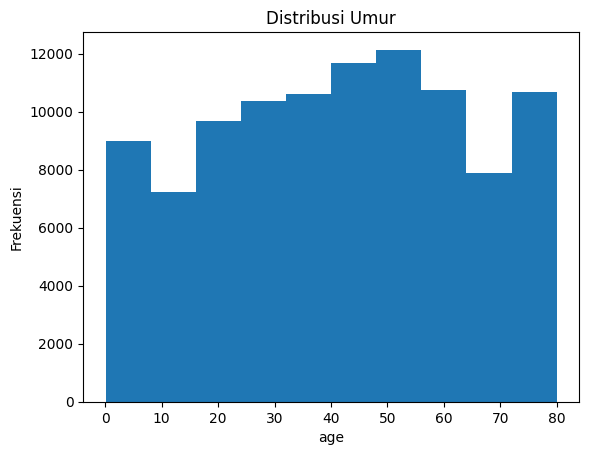

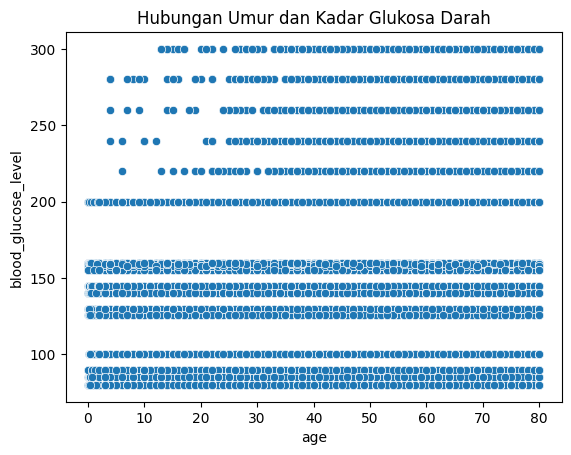

<ipython-input-7-3ad59ddcb8e0>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


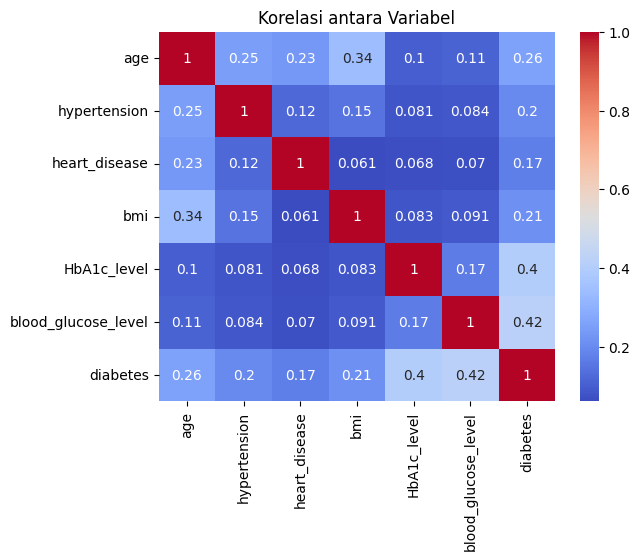

In [7]:
# membuat histogram untuk umur
plt.hist(df2["age"], bins=10)
plt.xlabel("age")
plt.ylabel("Frekuensi")
plt.title("Distribusi Umur")
plt.show()


# membuat scatter plot untuk umur vs. kadar glukosa darah
sns.scatterplot(x="age", y="blood_glucose_level", data=df2)
plt.title("Hubungan Umur dan Kadar Glukosa Darah")
plt.show()

# membuat heatmap untuk korelasi antara variabel
corr = df2.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelasi antara Variabel")
plt.show()

## Data Preparation


In [8]:
df2.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
# menampilkan banyaknya data yang bernilai null dan tidak null
df2.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
# menampilkan banyaknya jumlah data
len(df2)

100000

In [11]:
# Menghapus duplikat data berdasarkan semua kolom
df2.drop_duplicates(inplace=True)

df2

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [12]:
# menampilkan banyaknya jumlah data
len(df2)

96146

In [13]:
import plotly.express as px

df2_corr = pd.get_dummies(df2).corr()

px.imshow(df2_corr)

## Modelling

### Preprocessing

In [14]:
# Untuk Clustering
from sklearn.cluster import KMeans

# Untuk scalling dan normalisasi
from sklearn.preprocessing import StandardScaler

# Metric Pengukuran
# sumber : https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [15]:
# PreProcessing
# Encoding DataTraining
X_train = pd.get_dummies(df2,drop_first=True)

In [16]:
# Creating a class to handle clustering
class Cluster:
    
    # Pada constructor terjadi beberapa proses
    # 1. Membuat normalisasi data
    
    def __init__(self,train):
        self.train = train
        self.scaled = StandardScaler().fit_transform(self.train)
        self.clusters = None
        self.name = None
        self._label = None

    # Method apply adalah fungsi kedua yang harus dijalankan
    # Method apply akan menerima argumen tambahan sebagai argumen untuk 
    # algoritma cluster yang akan digunakan
    def apply(self,cluster_algo,**kwargs):
        agg_cluster = cluster_algo(**kwargs)


        self.clusters = agg_cluster.fit(self.scaled) #Set Value
        self._label = self.clusters.labels_ #Set value

        # Mengambil nama algoritma clusternya
        self.name = type(self.clusters).__name__

        return self
    
    # Df untuk membuat dataframe
    def df2(self,normalized=False):

        if normalized:
            X = pd.DataFrame(self.scaled,columns=self.train.columns)
        else:
            X = self.train.copy(deep=True)
        
        X["Cluster"] = self._label
        X["Cluster"] = X['Cluster'].astype(object)

        return X
    # Untuk Mendapatkan cluster ke N
    def get_cluster(self,n,normalized=False):
        df2 = self.df2(normalized)
        
        return df2[df2["Cluster"] == n]

    # Plot untuk membuat scatterplot 
    def plot(self,X,Y,normalized=False):
        return px.scatter(self.df2(normalized), x=X, y=Y, color="Cluster")

    # Plot 3d untuk membuat scatterplot 3d
    def plot_3d(self,X,Y,Z,normalized=False):
        return px.scatter_3d(self.df2(normalized), x=X, y=Y,z=Z, color="Cluster")

    # menggunakan decorator property untuk mengonversi method menjadi property
    @property
    def metric(self): #Method ini berfungsi untuk mengambil hasil pengukuran berdasrkan metric ...
        label = self._label
        # Ini metric yang digunakan 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'
        
        return [silhouette_score(self.scaled,label),davies_bouldin_score(self.scaled,label),calinski_harabasz_score(self.scaled,label)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

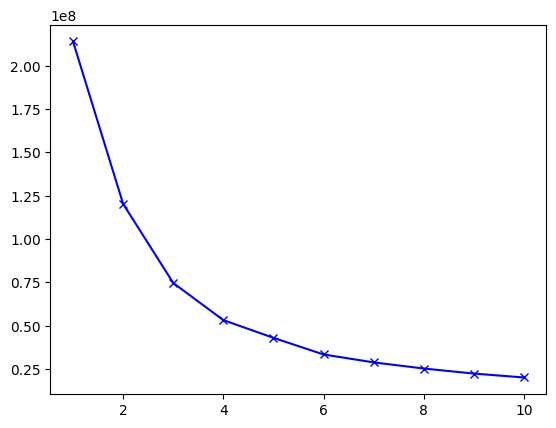

In [17]:
sse = [] #Daftar SSE
K = range(1,11) #Banyak Cluster hingga 11
# Perulangan hingga 11 Cluster
for k in K:
    kmeans = KMeans(n_clusters= k,random_state=42).fit(X_train)
    #Mendapatkan SSE dan append ke list sse
    sse.append(kmeans.inertia_)

# Membuat plot K terhadap SSE
plt.plot(K,sse, "bx-")


###  Modelling



#### K-Means

In [18]:
# Pertama-tama kita perlu menerapkan algoritma KMeans kedalam kelas Cluster
kmeans = Cluster(X_train).apply(KMeans,n_clusters=4,random_state=42) #n_cluster adalah banyak clusternya

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [19]:
# Untuk menampilkan dataframe 
kmeans.df2().head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,Cluster
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0,1
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0,0,1
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,1,0,1
3,36.0,0,0,23.45,5.0,155,0,0,0,1,0,0,0,0,3
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0,3


In [20]:
# Menampilkan plot berdasarkan dataframe dan 3 variabel x,y,z
kmeans.plot_3d("age","HbA1c_level","blood_glucose_level")

### Metrik Pengukuran

In [21]:
# Algoritma yang dipakai
algo = [kmeans]

# Untuk menampung hasil metrik (bentuk list dari list metrics ini adalah nested list)
metrics = [i.metric for i in algo]

# Nama dari setiap algo menjadi indexnya
index = [i.name for i in algo]

# Penamaan Kolmnya
df_metric = pd.DataFrame(metrics, index=index, columns=['silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'])

def _color_green(df):
      return 'background-color: green; color:white'


In [22]:
df_metric.style.applymap(_color_green)

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
KMeans,0.237700,1.495170,10613.103507


## Evaluation

###Analisis Cluster

In [23]:
# Pertama kita perlu membuat fungsi plot untuk plotting cluster
def plot_cluster(cluster_df):
    plot, ax = plt.subplots(2,4,figsize=(30,7),constrained_layout = True)
    sns.countplot(data=cluster_df,x="gender_Male",ax=ax[1][3])
    for i,col in enumerate(cols):
        sns.histplot(data=cluster_df,x=col,ax=ax[0][i],kde=True)
        sns.boxplot(data=cluster_df,x=col,ax=ax[1][i])

In [24]:
# Kolom yang berisi numerikkal
cols = ["age","HbA1c_level","blood_glucose_level"]

In [25]:
cluster1 = kmeans.get_cluster(0)
cluster2 = kmeans.get_cluster(1)
cluster3 = kmeans.get_cluster(2)
cluster4 = kmeans.get_cluster(3)

In [26]:
cluster1.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.0,7791.0,7791.0,7791.0,7791.0,7791.0
mean,55.389809,0.115390,0.074445,29.068117,5.400693,132.918752,0.010525,0.471313,0.0,0.0,0.0,1.0,0.0,0.0
std,16.871915,0.319512,0.262510,6.030073,0.976553,33.864363,0.102056,0.499208,0.0,0.0,0.0,0.0,0.0,0.0
min,7.000000,0.000000,0.000000,10.770000,3.500000,80.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
25%,43.000000,0.000000,0.000000,25.700000,4.800000,100.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
50%,57.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
75%,69.000000,0.000000,0.000000,31.670000,6.200000,158.000000,0.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0
max,80.000000,1.000000,1.000000,73.770000,6.800000,200.000000,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0


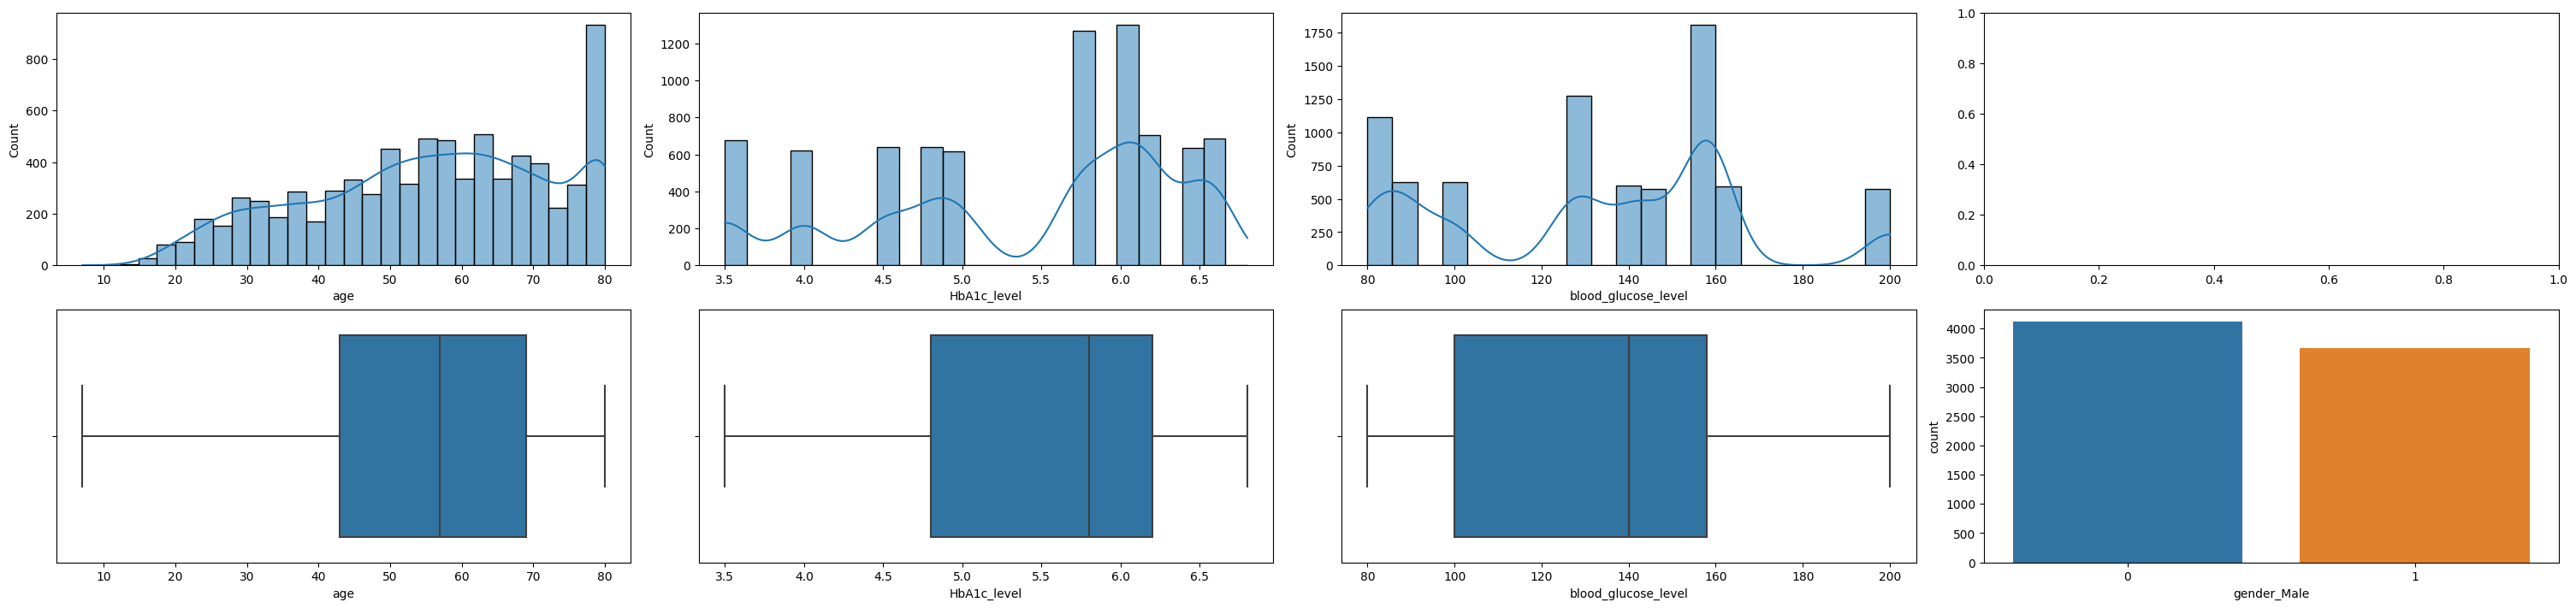

In [27]:
# Menampilkan distribusi dari cluster1
plot_cluster(cluster1)

Ciri-ciri cluster 1 :
1. Umur pasien kebanyakan di rentang 43-69 tahun, dan paling banyak 80 tahun
2. HbA1c level pasien rata-rata 5.4
3. Level glukosa darah pasien rata-rata 133 
4. Semua pasien adalah mantan perokok (former)
5. Sebagian kecil pasien memiliki diabetes yaitu 0.01%

In [28]:
# Menampilkan deskripsi statistik dari cluster 2
cluster2.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,71626.000000,71626.000000,71626.000000,71626.000000,71626.000000,71626.000000,71626.0,71626.000000,71626.000000,71626.0,71626.000000,71626.0,71626.000000,71626.000000
mean,37.917764,0.052914,0.024014,26.483440,5.397088,132.730056,0.0,0.399087,0.000251,0.0,0.049032,0.0,0.433111,0.079189
std,22.695593,0.223863,0.153092,6.539814,0.969671,34.261604,0.0,0.489714,0.015851,0.0,0.215937,0.0,0.495509,0.270036
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,19.000000,0.000000,0.000000,22.430000,4.800000,100.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,38.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,56.000000,0.000000,0.000000,28.580000,6.200000,158.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,6.600000,200.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000


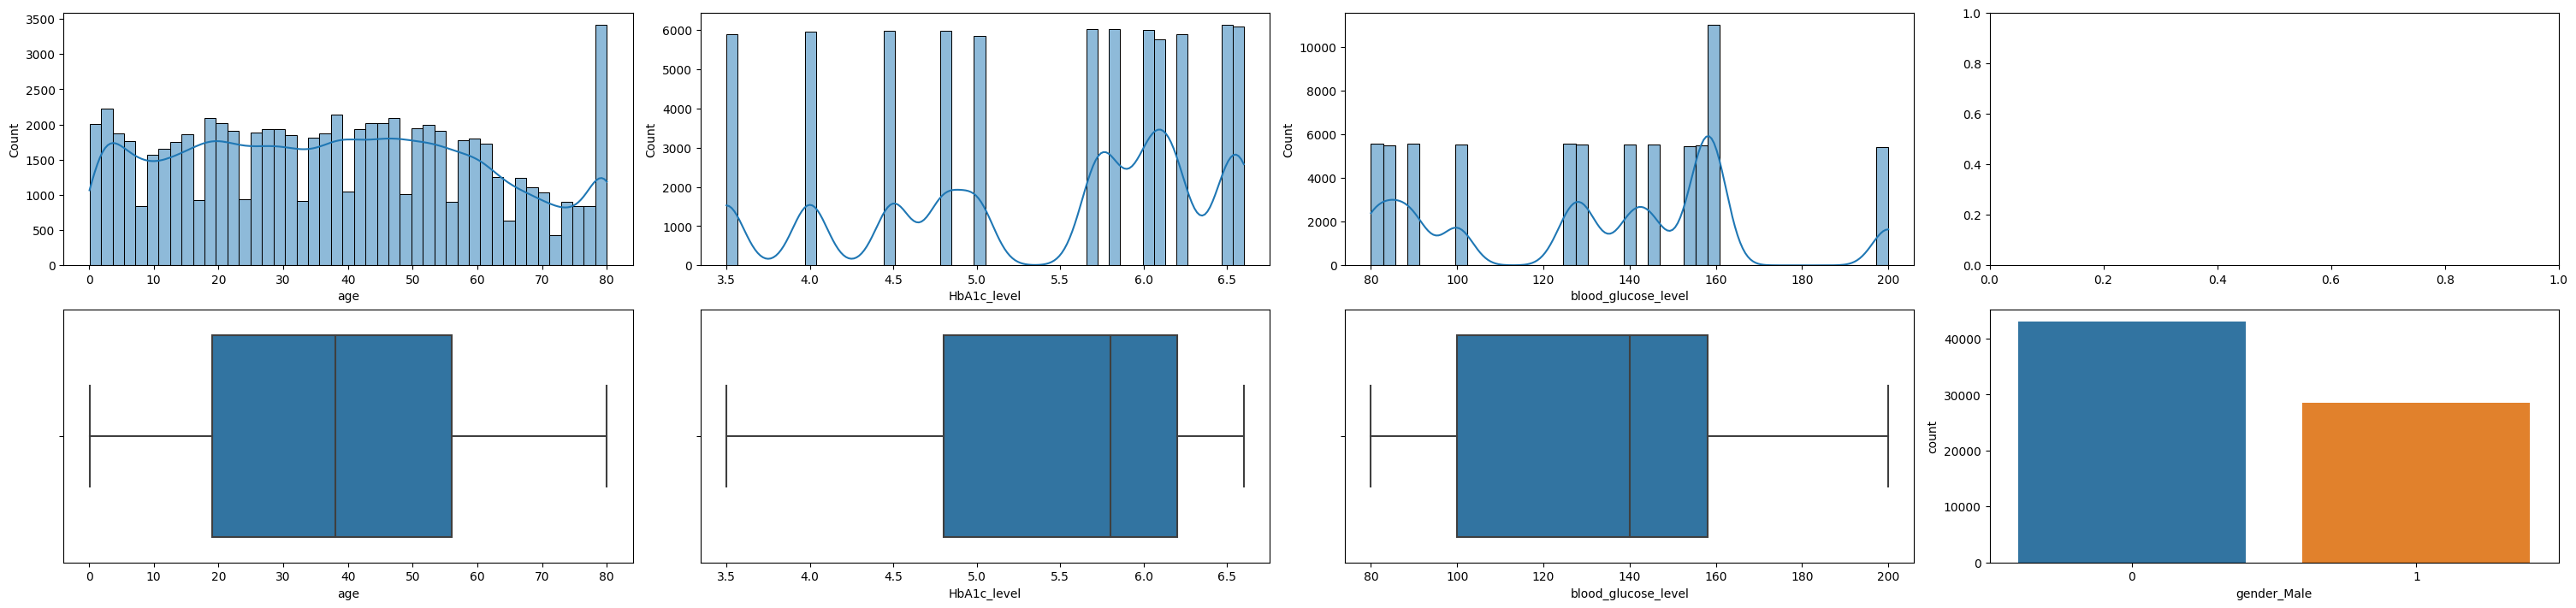

In [29]:
# Menampilkan deskripsi statistik dari cluster 2
plot_cluster(cluster2)

Ciri-ciri cluster 2:
1. Umur pasien kebanyakan di rentang 19-56 tahun, dan paling banyak 80 tahun
2. HbA1c level pasien rata-rata 5.4
3. Level glukosa darah pasien rata-rata 133
4. Pasien tidak memiliki diabetes

In [30]:
# Menampilkan deskripsi statistik dari cluster 3
cluster3.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.0,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000
mean,61.201105,0.259455,0.161484,32.104447,6.950822,195.325729,0.990395,0.473886,0.0,0.095690,0.058350,0.181054,0.405331,0.083443
std,14.497574,0.438362,0.367999,7.627699,1.078882,58.495923,0.097539,0.499348,0.0,0.294183,0.234419,0.385086,0.490985,0.276568
min,3.000000,0.000000,0.000000,10.980000,4.500000,126.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,0.000000,27.320000,6.100000,145.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,0.000000,0.000000,30.100000,6.600000,160.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73.000000,1.000000,0.000000,36.050000,7.500000,240.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
max,80.000000,1.000000,1.000000,88.760000,9.000000,300.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


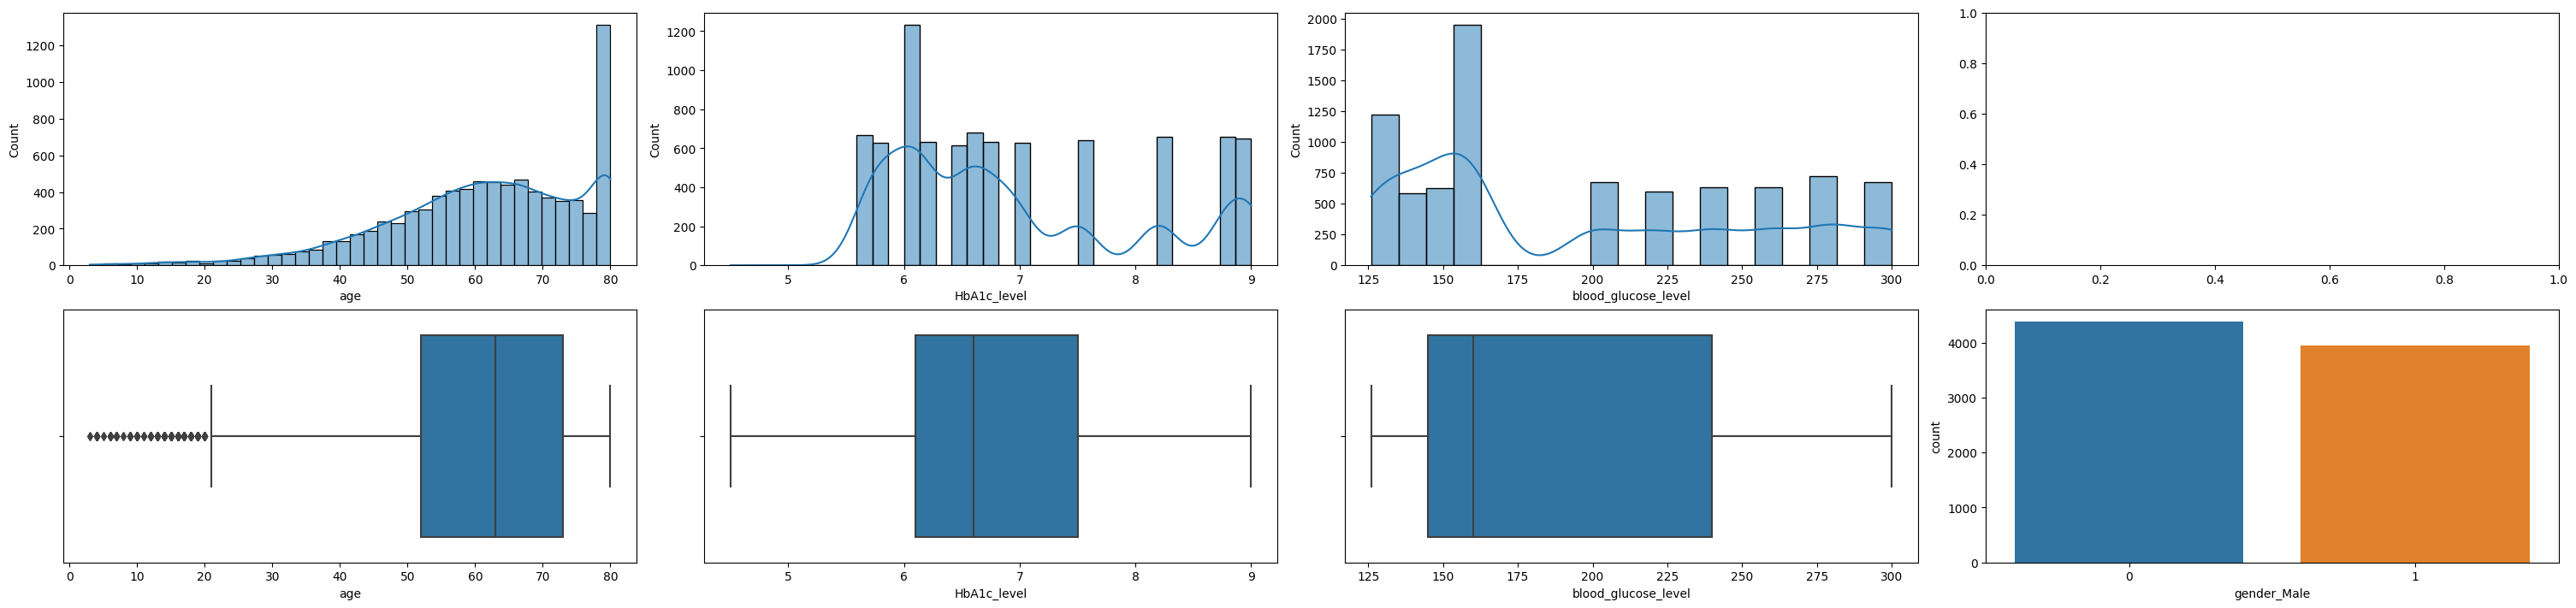

In [31]:
# Menampilkan distribusi dari cluster3
plot_cluster(cluster3)

Ciri-ciri cluster 3:
1. Umur pasien kebanyakan di rentang 52-73 tahun, dan paling banyak 80 tahun
2. HbA1c level pasien rata-rata 6.9
3. Level glukosa darah rata-rata 195
4. Hampir semua pasien memiliki diabetes (99%)

In [32]:
# Menampilkan deskripsi statistik dari cluster 4
cluster4.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0
mean,42.996843,0.072738,0.033095,28.104608,5.404310,133.305833,0.017976,0.447976,0.0,1.0,0.0,0.0,0.0,0.0
std,15.379245,0.259722,0.178896,6.003619,0.971793,33.912958,0.132873,0.497316,0.0,0.0,0.0,0.0,0.0,0.0
min,0.320000,0.000000,0.000000,13.090000,3.500000,80.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
25%,30.000000,0.000000,0.000000,24.600000,4.800000,100.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
75%,53.000000,0.000000,0.000000,30.270000,6.200000,158.000000,0.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0
max,80.000000,1.000000,1.000000,75.780000,7.500000,200.000000,1.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0


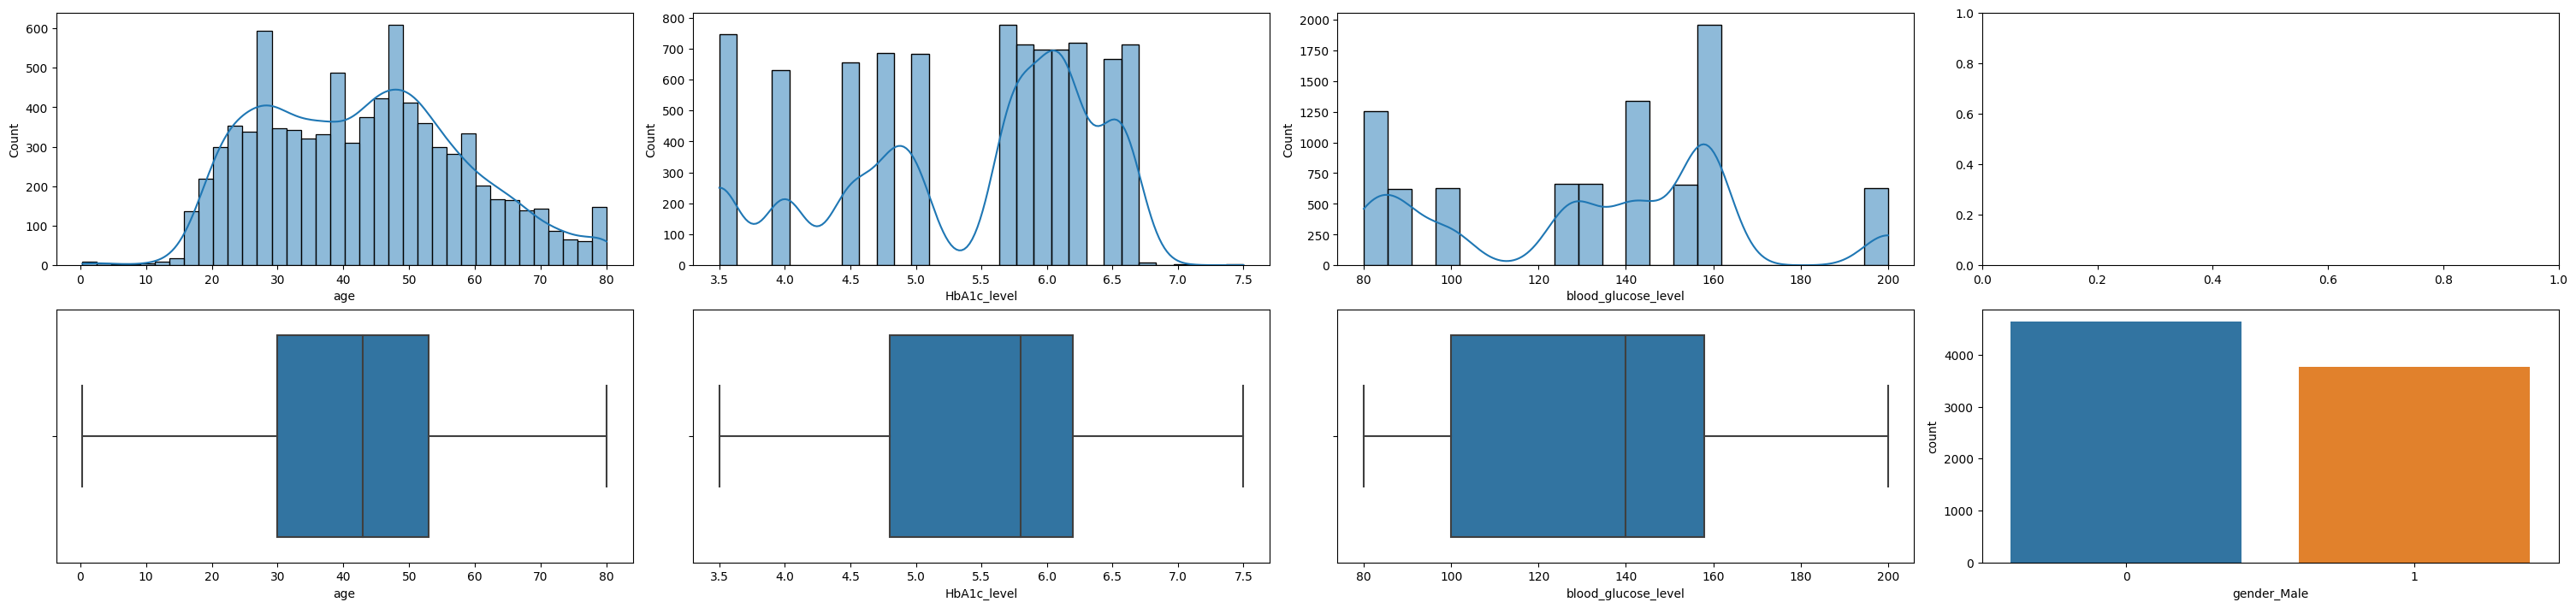

In [33]:
# Menampilkan distribusi dari cluster4
plot_cluster(cluster4)

Ciri-ciri cluster 4:
1. Umur pasien kebanyakan di rentang 30-53 tahun
2. HbA1c level pasien rata-rata 5.4
3. Level glukosa darah pasien rata-rata 133
4. Semua pasien adalah perokok (current)
5. Sebagian kecil pasien memiliki diabetes (0.2%)

##Deployment

####Summary
Berdasarkan hasil clustering dataset diabetes di atas, dapat disimpulkan bahwa kriteria (kolom) yang paling mempengaruhi dan signifikan untuk menentukan pasien memiliki diabetes atau tidak adalah HbA1c_level (gula darah) dan blood_glucose_level (level glukosa darah), seperti yang dapat dilihat di cluster 3, rata-rata pasien memiliki gula darah 6.95 dan level glukosa darah 195, nilai ini jauh dari ketiga cluster lainnya yaitu cluster 1,2 dan 4 yang rata-rata pasien memiliki gula darah 5.4 dan level glukosa darah 133. Dapat disimpulkan juga bahwa pasien yang memiliki diabetes cenderung berisiko untuk mengidap hipertensi (26%) dan penyakit jantung (16%) berdasarkan data rata-rata pasien.
Adapun ciri-ciri unik yang dimiliki tiap-tiap cluster yaitu sebagai berikut:

Ciri-ciri cluster 1 :
1. Umur pasien kebanyakan di rentang 43-69 tahun, dan paling banyak 80 tahun
2. HbA1c level pasien rata-rata 5.4
3. Level glukosa darah pasien rata-rata 133 
4. Semua pasien adalah mantan perokok (former)
5. Sebagian kecil pasien memiliki diabetes yaitu 0.01%

Ciri-ciri cluster 2:
1. Umur pasien kebanyakan di rentang 19-56 tahun, dan paling banyak 80 tahun
2. HbA1c level pasien rata-rata 5.4
3. Level glukosa darah pasien rata-rata 133
4. Pasien tidak memiliki diabetes

Ciri-ciri cluster 3:
1. Umur pasien kebanyakan di rentang 52-73 tahun, dan paling banyak 80 tahun
2. HbA1c level pasien rata-rata 6.9
3. Level glukosa darah rata-rata 195
4. Hampir semua pasien memiliki diabetes (99%)

Ciri-ciri cluster 4:
1. Umur pasien kebanyakan di rentang 30-53 tahun
2. HbA1c level pasien rata-rata 5.4
3. Level glukosa darah pasien rata-rata 133
4. Semua pasien adalah perokok (current)
5. Sebagian kecil pasien memiliki diabetes (0.2%)

####Save Data
Dataset yang telah diproses pada tahap **Modelling** akan disimpan, karena dataset pada proses itu telah dimudahkan untuk dipresentasi dan divisualisasikan pada tahap lanjutan di luar dari analisis ini.

In [34]:
df2.to_csv('diabetes predictions - Deployment.csv', index=False)